In [1]:
!pip install imbalanced-learn --quiet

In [2]:
import imblearn
from collections import Counter
from sklearn.datasets import make_classification
import numpy as np
from matplotlib import pyplot

In [3]:
x,y = make_classification(n_samples = 10000,n_features = 2, n_redundant = 0,n_clusters_per_class = 1, random_state = 1,weights = [0.99],flip_y = 0)

In [4]:
counter = Counter(y)

In [5]:
counter

Counter({0: 9900, 1: 100})

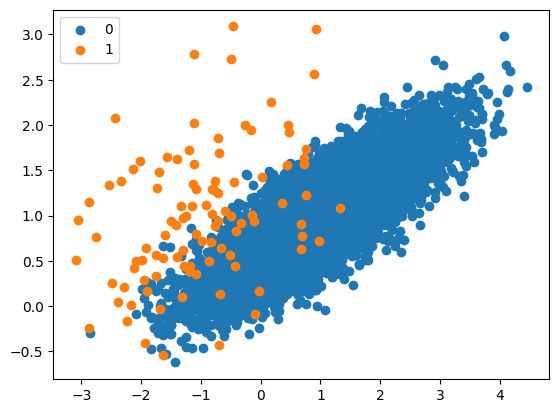

In [6]:
for label, _ in counter.items():
	row_ix = np.where(y == label)[0]
	pyplot.scatter(x[row_ix, 0], x[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

### SMOTE

In [7]:
from imblearn.over_sampling import SMOTE

In [8]:
oversample = SMOTE()
x_smote,y_smote = oversample.fit_resample(x,y)

In [9]:
counter = Counter(y_smote)

In [10]:
counter

Counter({0: 9900, 1: 9900})

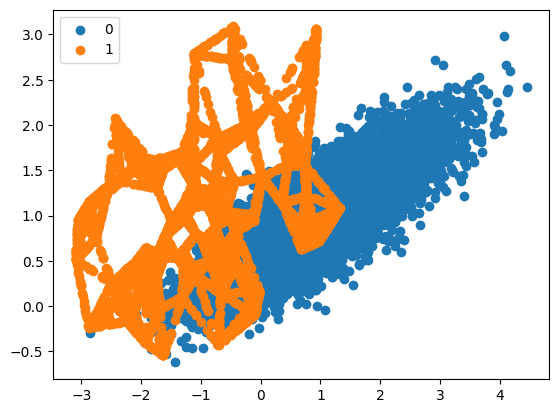

In [11]:
for label, _ in counter.items():
	row_ix = np.where(y_smote == label)[0]
	pyplot.scatter(x_smote[row_ix, 0], x_smote[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

### SMOTE with Random UnderSampling

In [12]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

over = SMOTE(sampling_strategy = 0.1)
under = RandomUnderSampler(sampling_strategy = 0.5)

steps = [('o',over),('u',under)]
pipeline = Pipeline(steps = steps)

x_sus,y_sus = pipeline.fit_resample(x,y)
counter = Counter(y_sus)

In [13]:
counter

Counter({0: 1980, 1: 990})

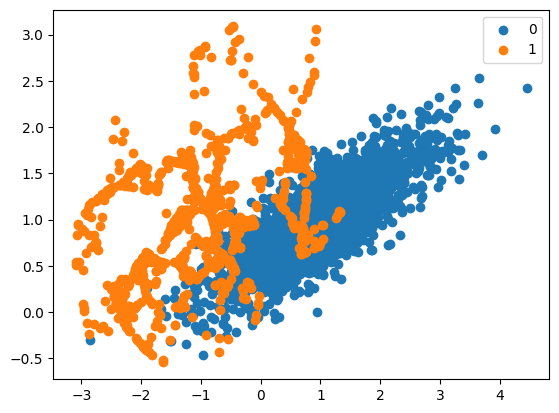

In [14]:
for label, _ in counter.items():
	row_ix = np.where(y_sus == label)[0]
	pyplot.scatter(x_sus[row_ix, 0], x_sus[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

### Classification with the Original Dataset

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

model = DecisionTreeClassifier()
cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
scores = cross_val_score(model,x,y,scoring = 'roc_auc',cv = cv,n_jobs = 1)
print(np.mean(scores))

0.7641414141414141


### Classification but with SMOTE

In [16]:
steps = [('over',SMOTE()),('model',DecisionTreeClassifier())]
pipeline = Pipeline(steps = steps)
cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
scores = cross_val_score(pipeline,x,y,scoring = 'roc_auc',cv = cv,n_jobs = -1)
print(np.mean(scores))

0.8144107744107743


### Classification with SMOTE and RandomUndersampling

In [17]:
model = DecisionTreeClassifier()
over = SMOTE(sampling_strategy = 0.1)
under = RandomUnderSampler(sampling_strategy = 0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps = steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, x, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print(np.mean(scores))

0.8361784511784511


### Borderline SMOTE -> which is essentially Borderline SMOTE 1

In [18]:
from imblearn.over_sampling._smote.filter import BorderlineSMOTE
oversample = BorderlineSMOTE()
x_bs1, y_bs1 = oversample.fit_resample(x,y)
counter = Counter(y_bs1)

In [19]:
counter

Counter({0: 9900, 1: 9900})

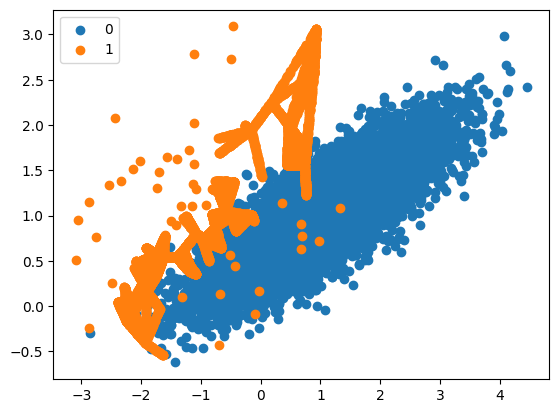

In [20]:
for label, _ in counter.items():
 row_ix = np.where(y_bs1 == label)[0]
 pyplot.scatter(x_bs1[row_ix, 0], x_bs1[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

### Borderline SMOTE with SVM

In [21]:
from imblearn.over_sampling import SVMSMOTE
oversample = SVMSMOTE()
x_bsvm,y_bsvm = oversample.fit_resample(x,y)
counter = Counter(y_bsvm)

In [22]:
counter

Counter({0: 9900, 1: 9900})

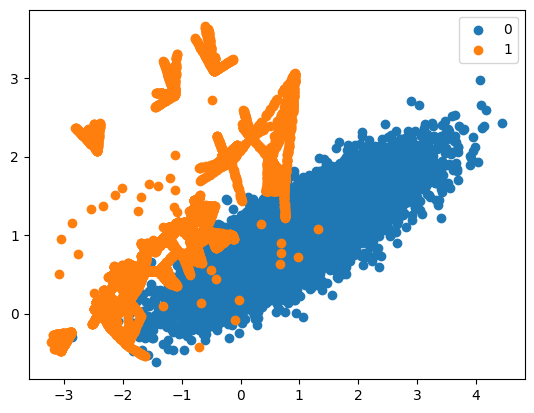

In [23]:
for label, _ in counter.items():
 row_ix = np.where(y_bsvm == label)[0]
 pyplot.scatter(x_bsvm[row_ix, 0], x_bsvm[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

### Adaptive Synthetic Sampling

In [24]:
from imblearn.over_sampling import ADASYN

In [25]:
oversample = ADASYN()
x_adap,y_adap = oversample.fit_resample(x,y)
counter = Counter(y_adap)

In [26]:
counter

Counter({0: 9900, 1: 9899})

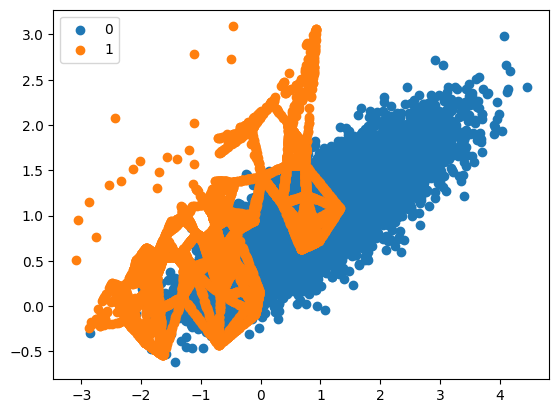

In [27]:
for label, _ in counter.items():
 row_ix = np.where(y_adap == label)[0]
 pyplot.scatter(x_adap[row_ix, 0], x_adap[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()